In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r"E:\Academics\Self Projects\Airline TS Project\airline-passengers.csv", index_col="Month", parse_dates=True)

In [3]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
df.isnull().sum()

Passengers    0
dtype: int64

In [6]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


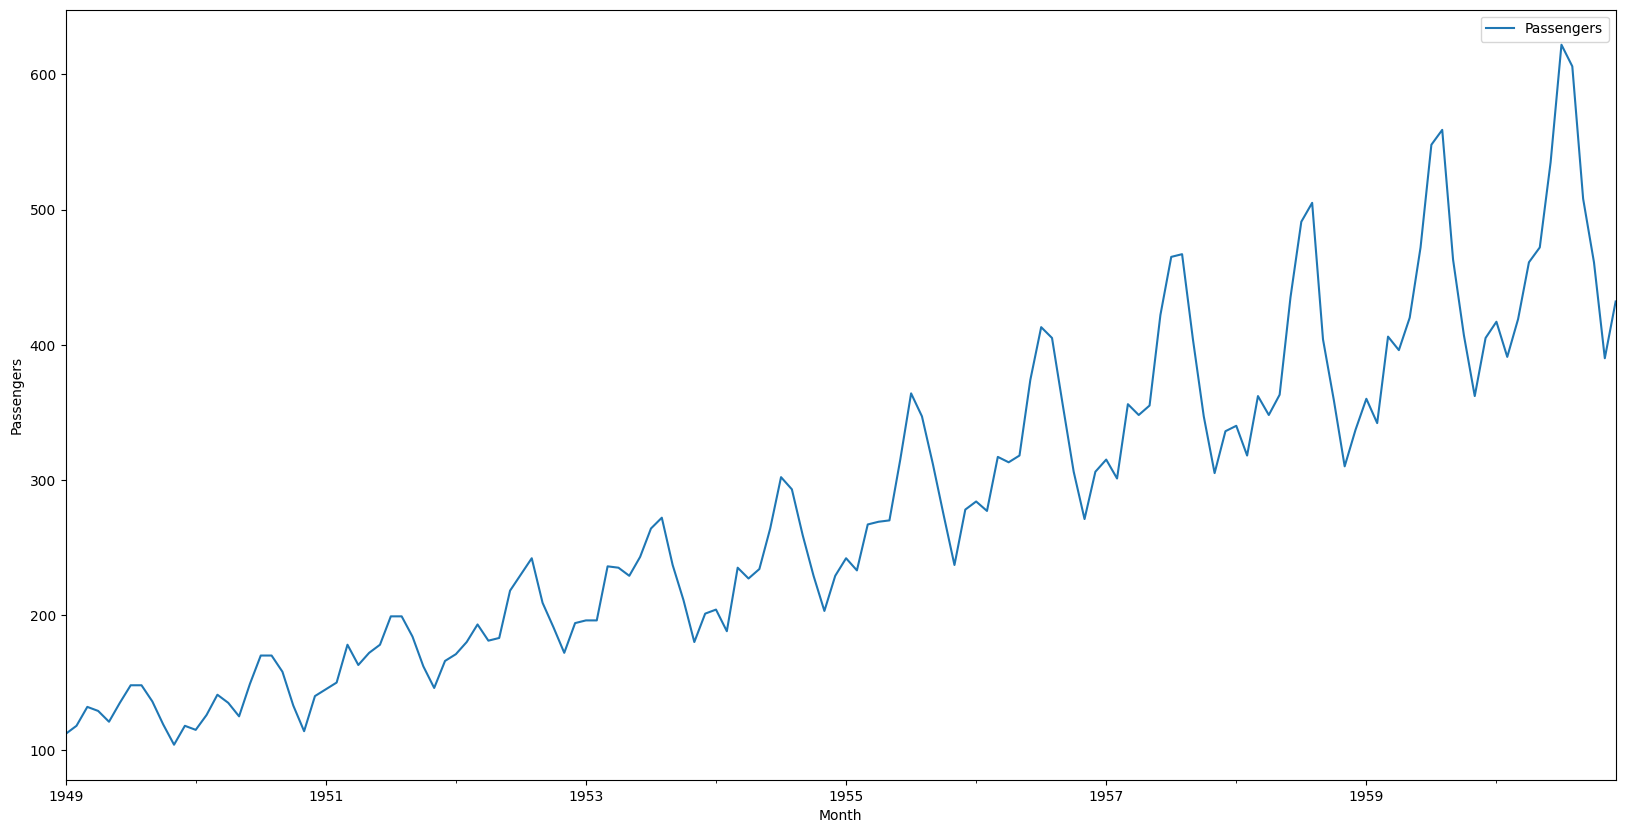

In [7]:
df.plot(figsize=(20,10))
plt.ylabel("Passengers")
plt.legend()
plt.show()

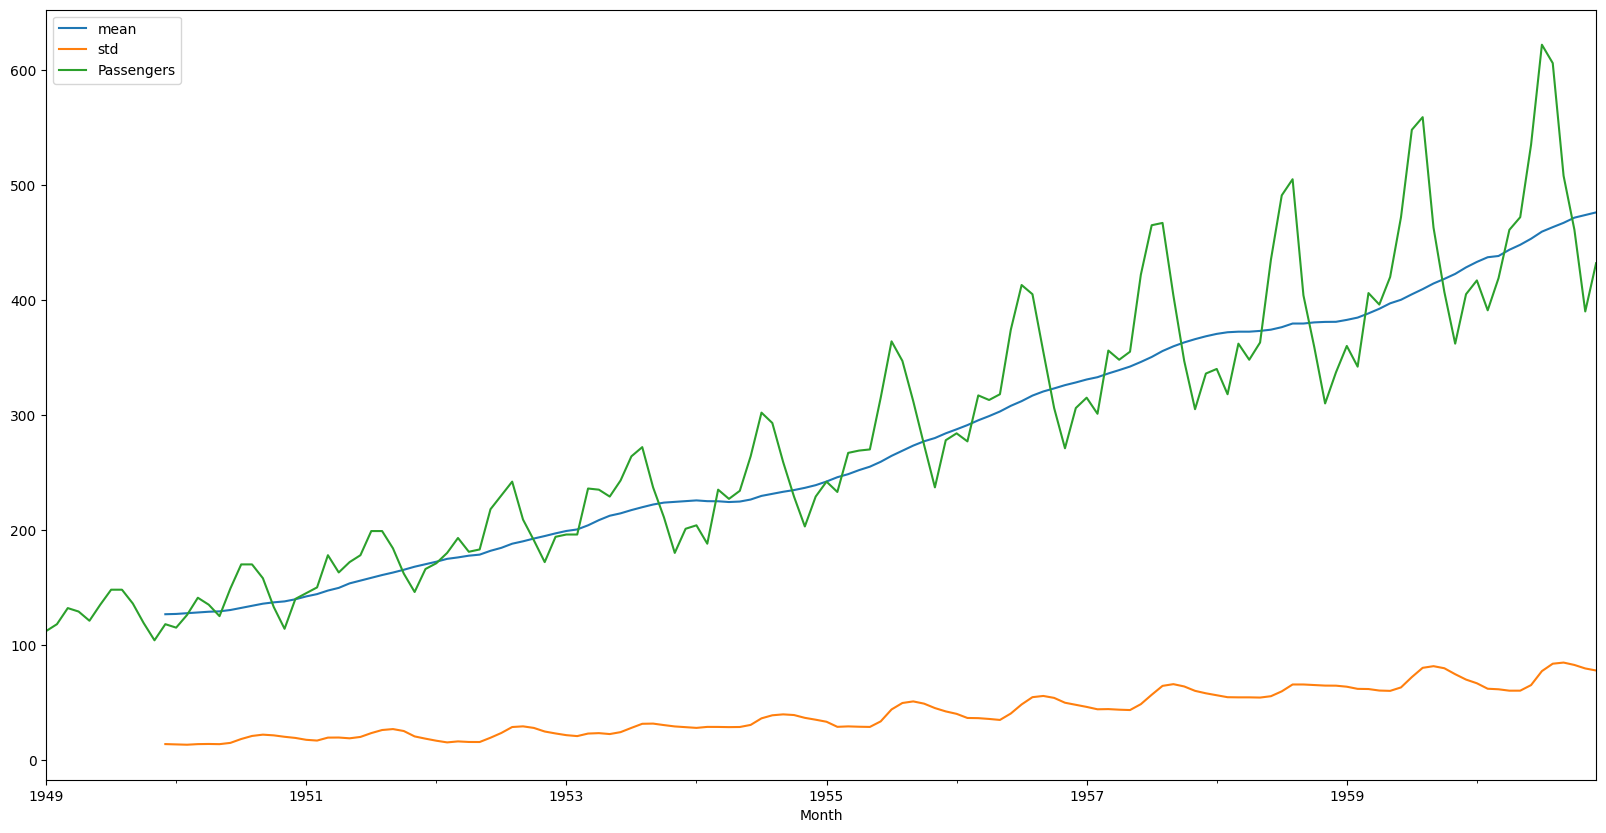

In [8]:
df["Passengers"].rolling(12).mean().plot(figsize=(20,10), label="mean")
df["Passengers"].rolling(12).std().plot(figsize=(20,10), label="std")
df["Passengers"].plot(figsize=(20,10), label="Passengers")
plt.legend()
plt.show()

<Figure size 2000x1000 with 0 Axes>

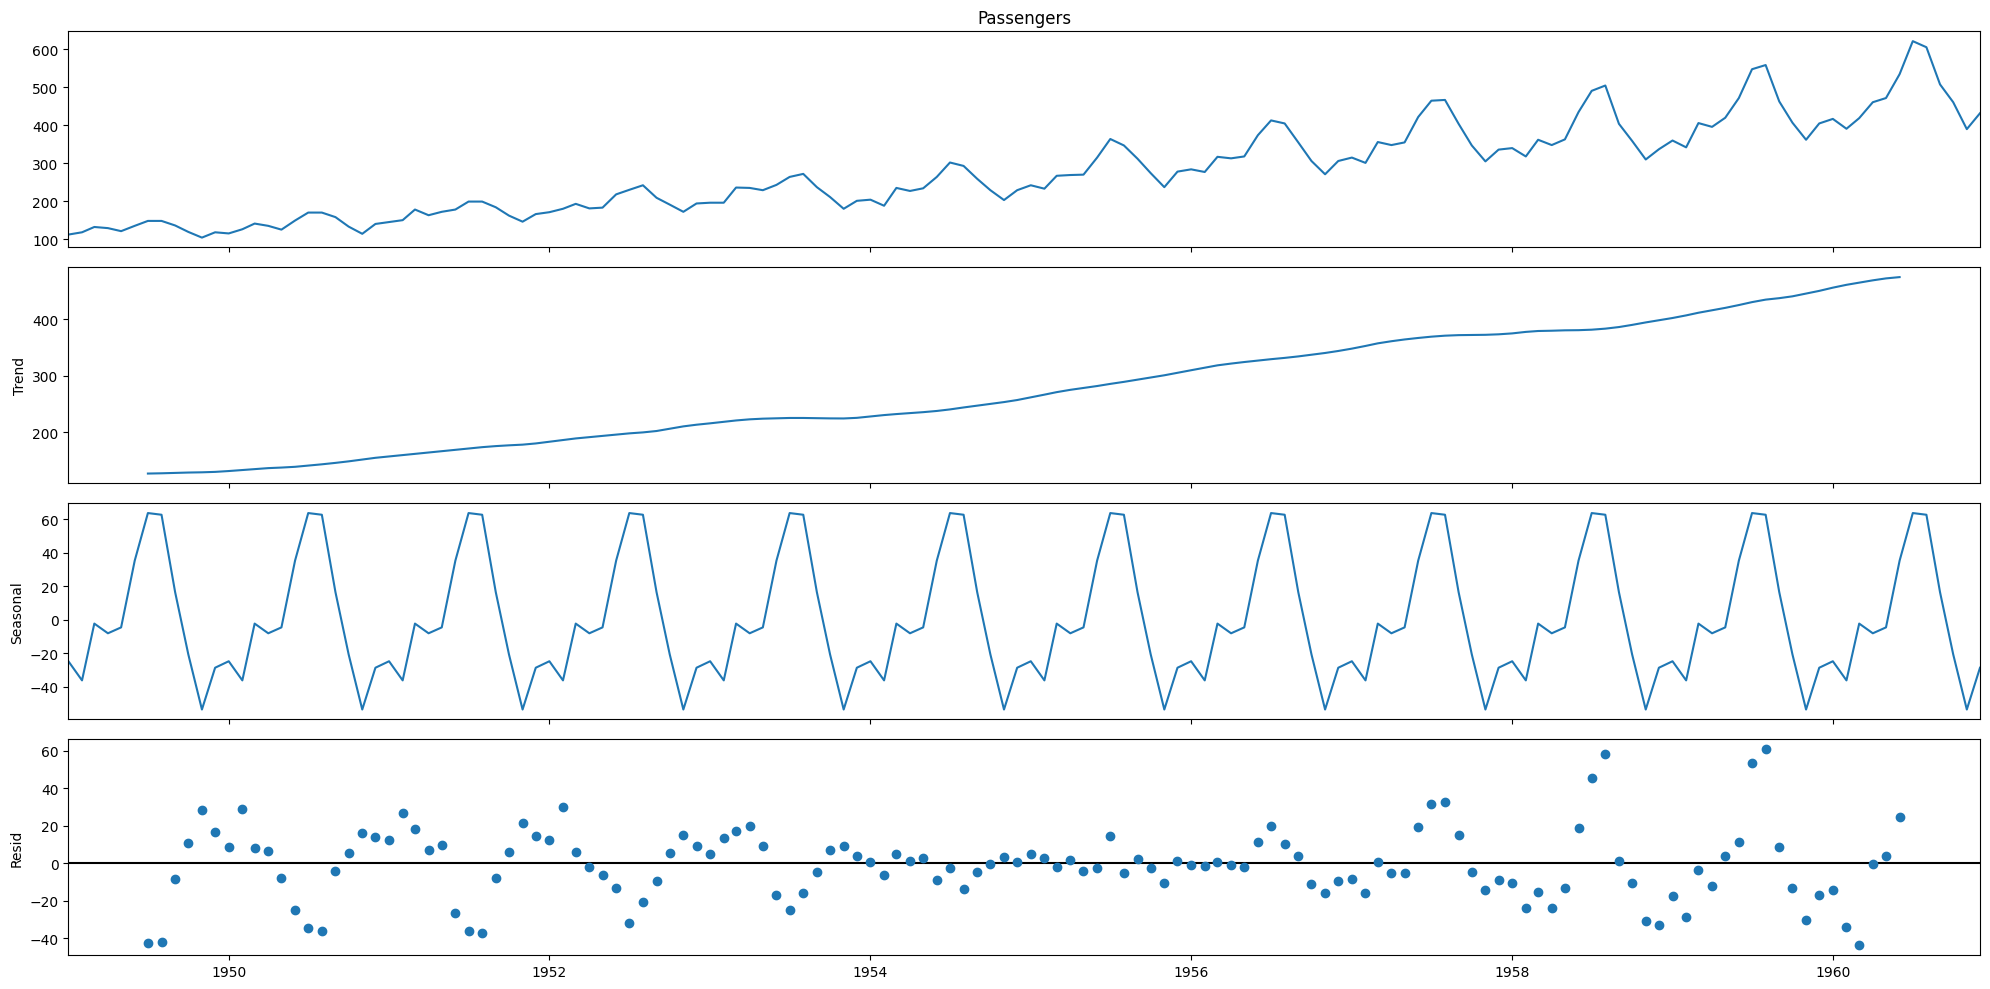

In [9]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 20,10
from statsmodels.tsa.seasonal import seasonal_decompose
sd =seasonal_decompose(df["Passengers"], period=12)
fig = plt.figure()
fig = sd.plot()
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
result = adfuller(df)

In [12]:
result

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [13]:
def test_stationarity(timeseries):
    print("results of AD Fuller Test")
    dftest = adfuller(timeseries, autolag="AIC")
    df_output = pd.Series(dftest[0:4], index=["Test Statistics", "P-value", "Lags Used", "Number Of Observations Used"])
    for key, value in dftest[4].items():
        df_output[f"critival value{key}"] = value
    print(df_output)


In [14]:
test_stationarity(df)

results of AD Fuller Test
Test Statistics                  0.815369
P-value                          0.991880
Lags Used                       13.000000
Number Of Observations Used    130.000000
critival value1%                -3.481682
critival value5%                -2.884042
critival value10%               -2.578770
dtype: float64


In [15]:
df["First_diff"] = df["Passengers"] - df["Passengers"].shift(2)

In [16]:
df

,Passengers,First_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,20.0
1949-04-01,129,11.0
1949-05-01,121,-11.0
...,...,...
1960-08-01,606,71.0
1960-09-01,508,-114.0
1960-10-01,461,-145.0


In [17]:
test_stationarity(df["First_diff"].dropna())

results of AD Fuller Test
Test Statistics                 -2.961695
P-value                          0.038630
Lags Used                       11.000000
Number Of Observations Used    130.000000
critival value1%                -3.481682
critival value5%                -2.884042
critival value10%               -2.578770
dtype: float64


In [18]:
from statsmodels.tsa.seasonal import STL

In [19]:
data = df["Passengers"]

In [20]:
seasonal_decomposition = STL(data, seasonal=13)
result = seasonal_decomposition.fit()

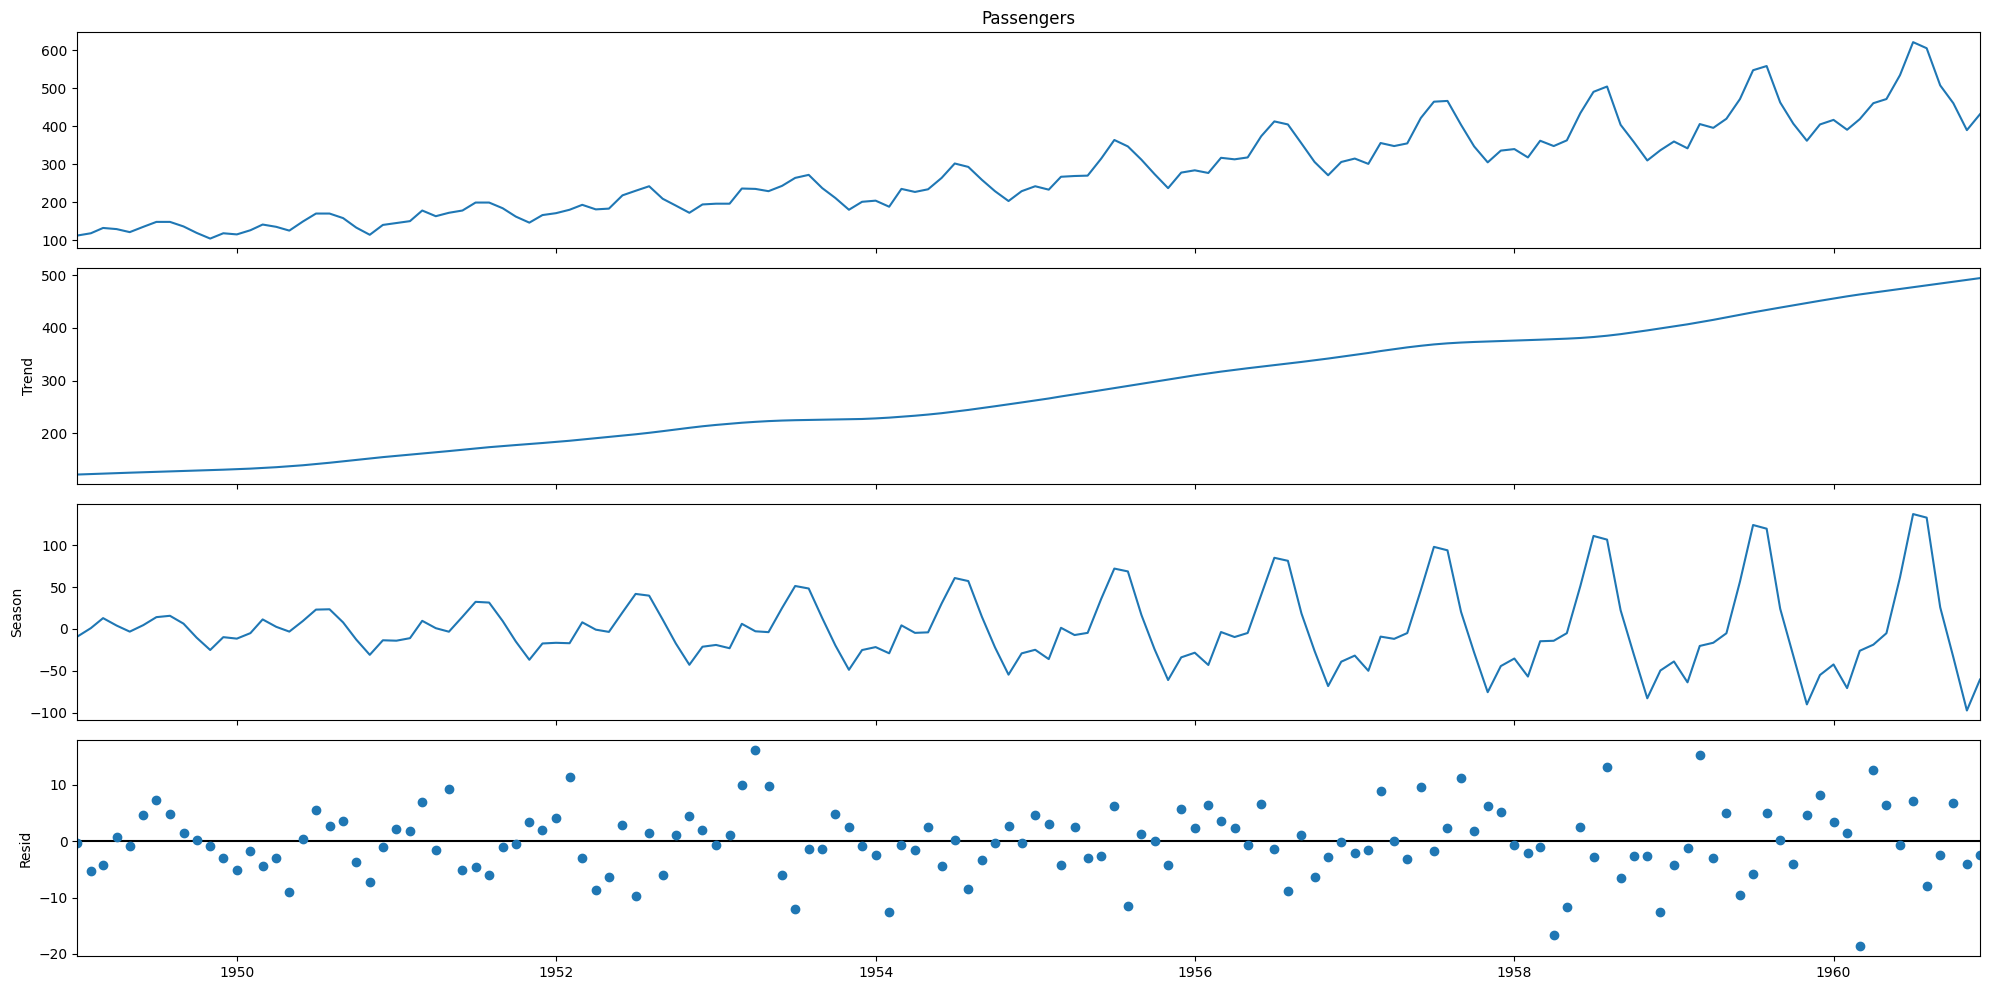

In [21]:
result.plot()
plt.show()

In [22]:
residuals = result.resid

In [23]:
test_stationarity(residuals)

results of AD Fuller Test
Test Statistics                 -5.098011
P-value                          0.000014
Lags Used                        9.000000
Number Of Observations Used    134.000000
critival value1%                -3.480119
critival value5%                -2.883362
critival value10%               -2.578407
dtype: float64


In [24]:
from pmdarima import auto_arima

In [25]:
auto_arima(df["Passengers"], m=12, trace=True, D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.73 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.11 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.40 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.17 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.41 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.16 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.35 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.32 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.67 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.05 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Wed, 08 Jan 2025   AIC                           1017.847
Time:                                     19:14:57   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.600      0.000      -1.057      -0.907
sigma2       129.3144     14.557      8.883      0.000     100.784     157.845
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
print(df.index.freq)

None


In [27]:
df.index = pd.to_datetime(df.index) 

In [28]:
df = df.asfreq('MS') 

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

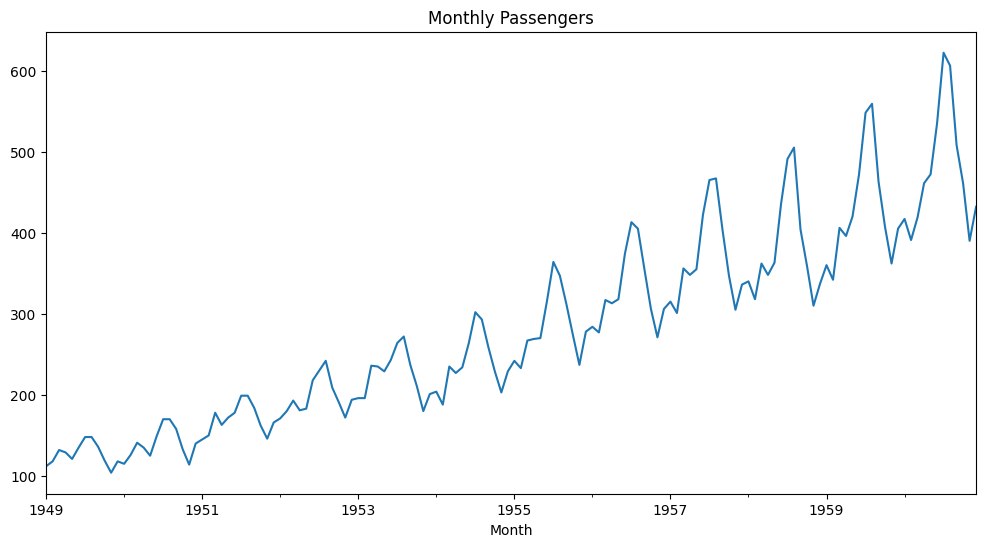

In [30]:
df['Passengers'].plot(figsize=(12, 6))
plt.title('Monthly Passengers')
plt.show()

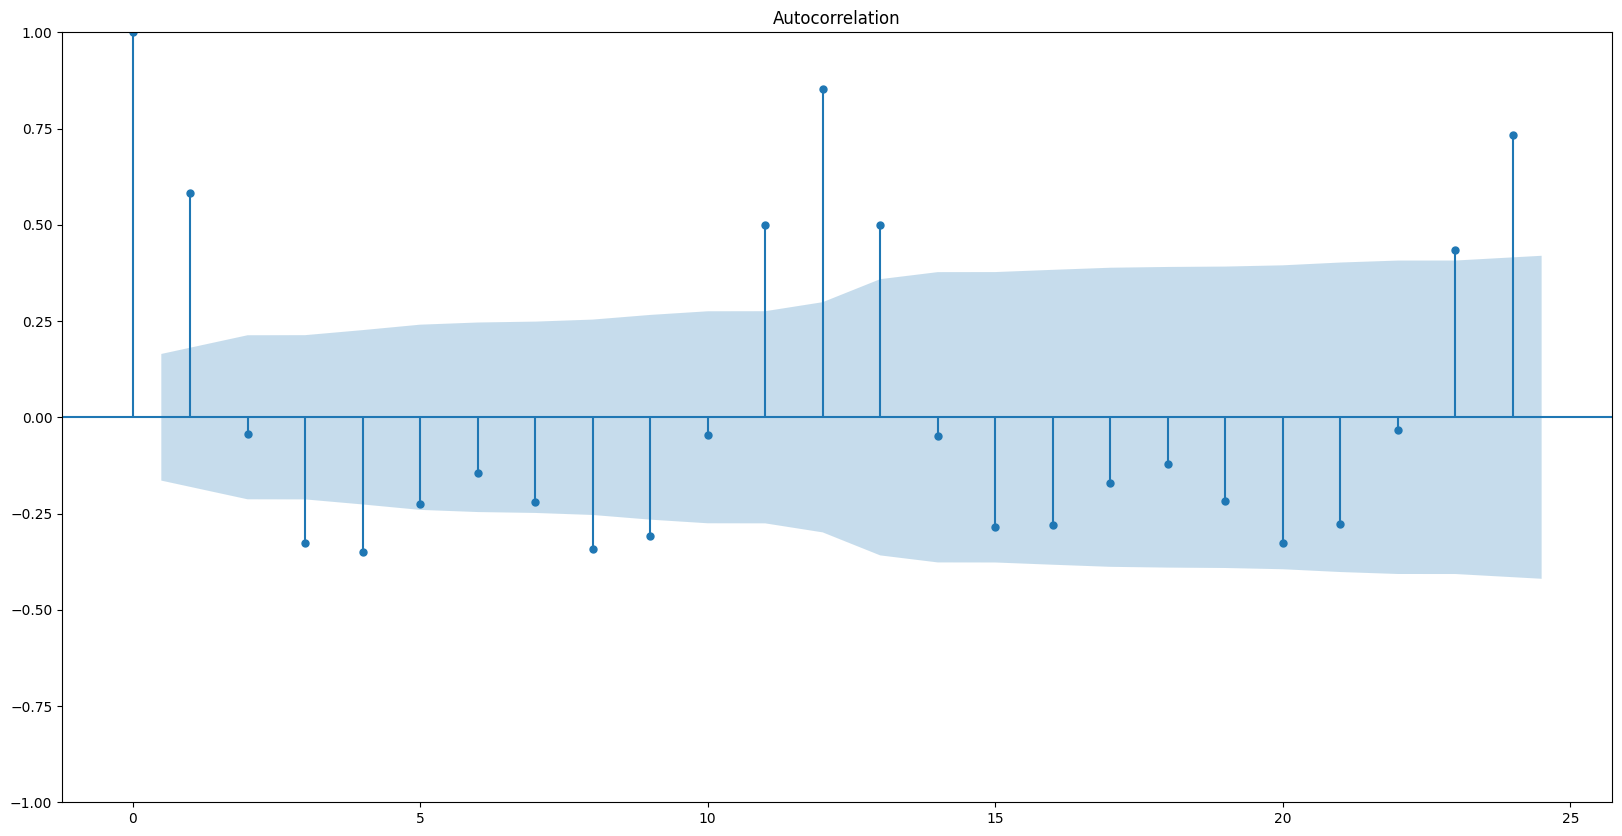

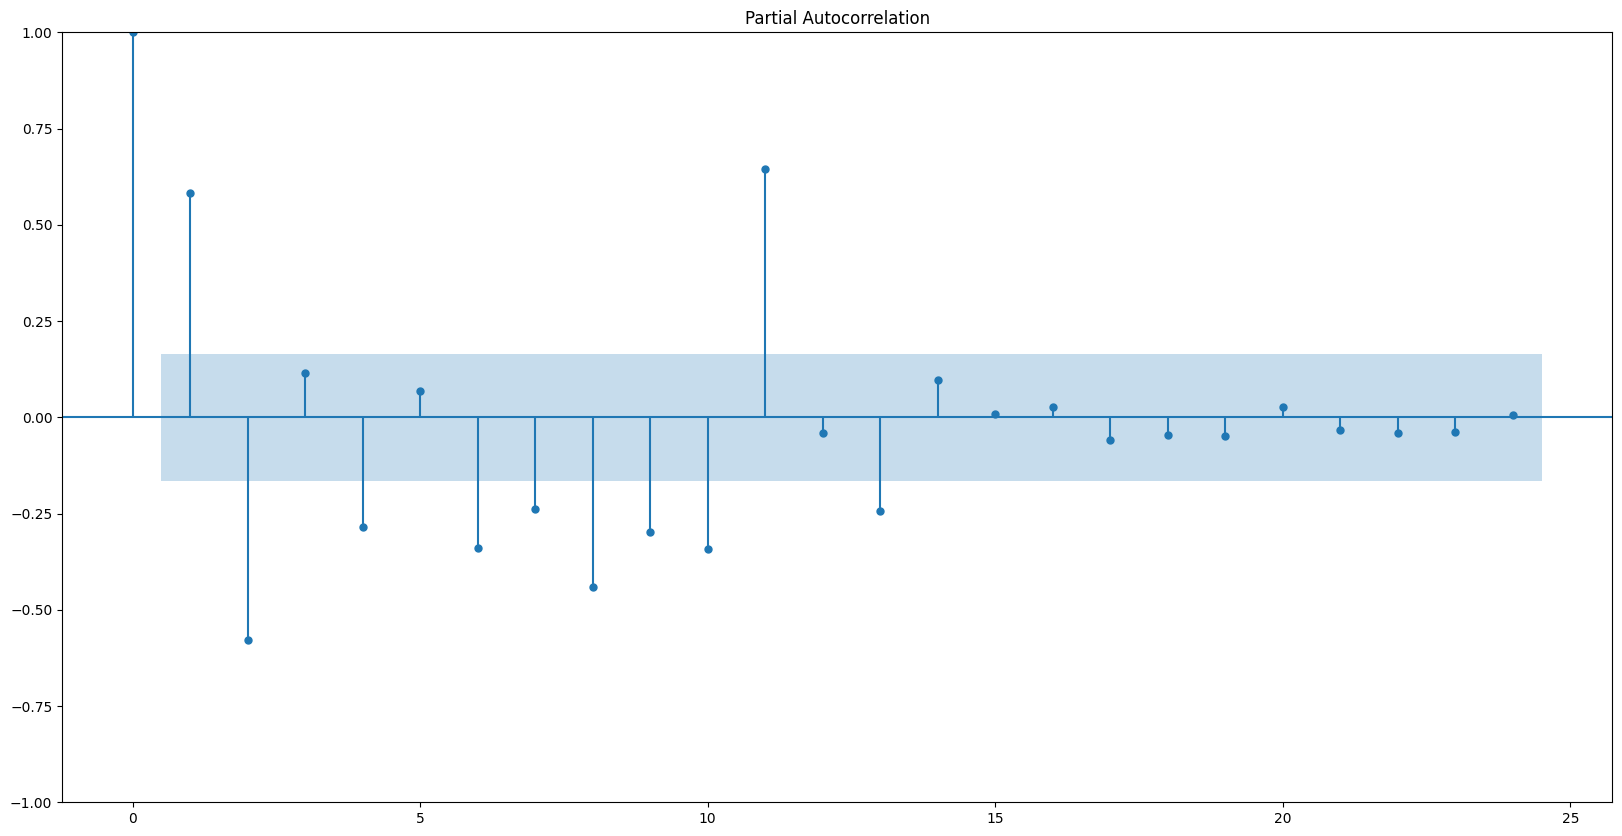

In [31]:
plot_acf(df["First_diff"].dropna(), lags=24)  
plot_pacf(df["First_diff"].dropna(), lags=24)
plt.show()

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
model = SARIMAX(df["Passengers"], order=(2,1,1), seasonal_order=(0,1,0,12))

In [34]:
result = model.fit()

e:\Programmes\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\Programmes\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [35]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Wed, 08 Jan 2025   AIC                           1017.847
Time:                                     19:14:58   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.600      0.000      -1.057      -0.907
sigma2       129.3144     14.557      8.883      0.000     100.784     157.845
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
df["Forecast"] = result.predict()
df["Forecast"]

Month
1949-01-01      0.000000
1949-02-01    111.997384
1949-03-01    117.999978
1949-04-01    131.998967
1949-05-01    128.999974
                 ...    
1960-08-01    623.923158
1960-09-01    513.859860
1960-10-01    450.774940
1960-11-01    410.897676
1960-12-01    439.947715
Freq: MS, Name: Forecast, Length: 144, dtype: float64

In [37]:
from sklearn.metrics import r2_score
r2_score(df["Passengers"].iloc[1:], df["Forecast"].iloc[1:])

0.9891491791508503

In [38]:
df

,Passengers,First_diff,Forecast
Month,,,
1949-01-01,112,NaN,0.000000
1949-02-01,118,NaN,111.997384
1949-03-01,132,20.0,117.999978
1949-04-01,129,11.0,131.998967
1949-05-01,121,-11.0,128.999974
...,...,...,...
1960-08-01,606,71.0,623.923158
1960-09-01,508,-114.0,513.859860
1960-10-01,461,-145.0,450.774940


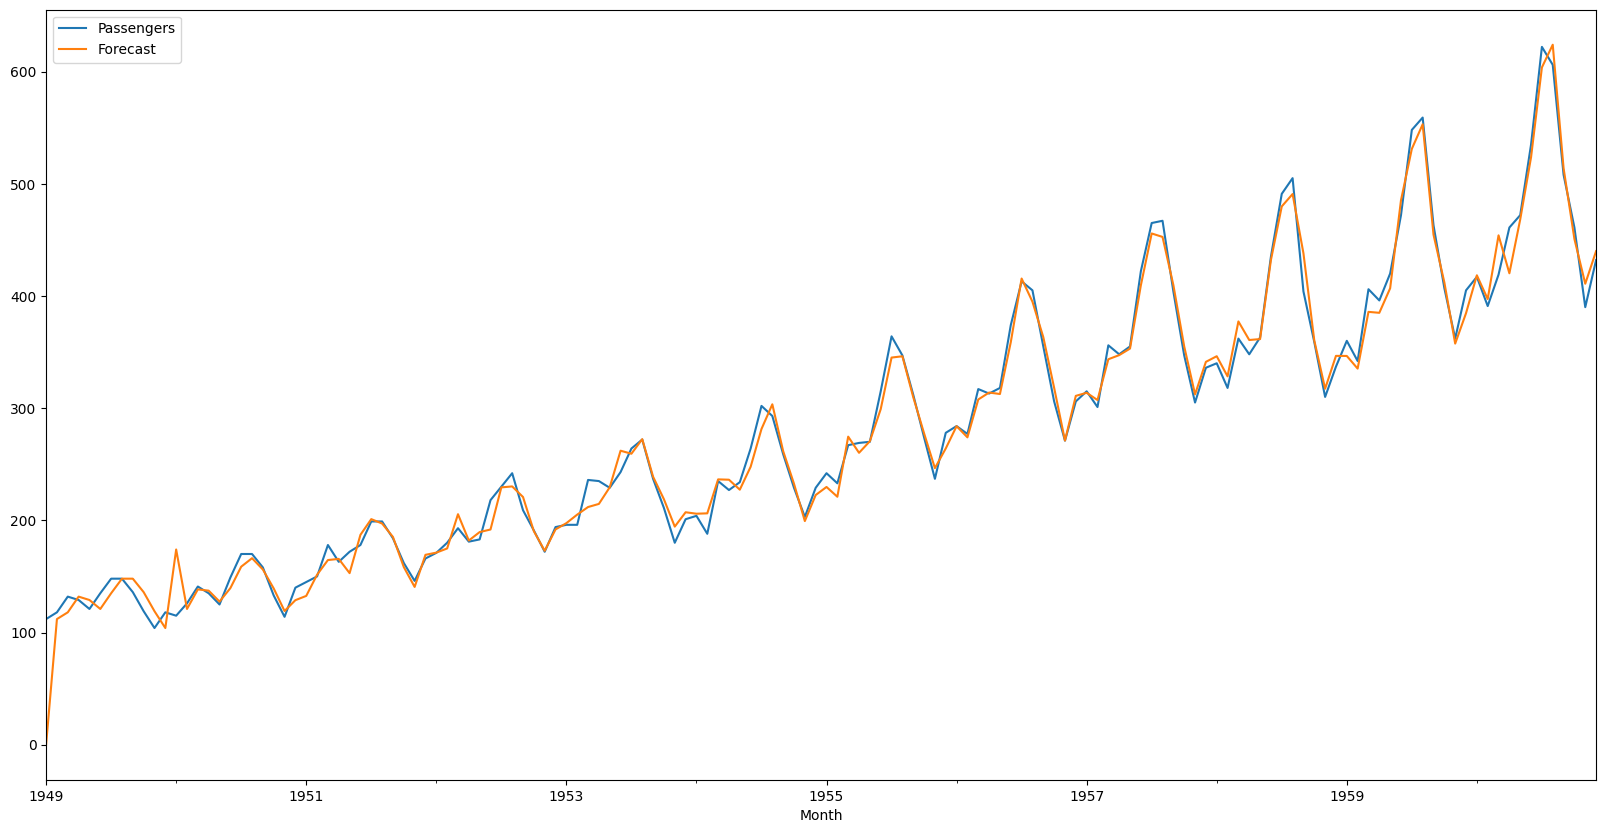

In [39]:
df[["Passengers", "Forecast"]].plot()
plt.show()

In [40]:
df.tail()

,Passengers,First_diff,Forecast
Month,,,
1960-08-01,606,71.0,623.923158
1960-09-01,508,-114.0,513.859860
1960-10-01,461,-145.0,450.774940
1960-11-01,390,-118.0,410.897676
1960-12-01,432,-29.0,439.947715


In [41]:
future_forecast = result.forecast(steps=36)


In [42]:
future_forecast

1961-01-01    445.634934
1961-02-01    420.395042
1961-03-01    449.198378
1961-04-01    491.840023
1961-05-01    503.394565
1961-06-01    566.862550
1961-07-01    654.260284
1961-08-01    638.597604
1961-09-01    540.883864
1961-10-01    494.126748
1961-11-01    423.332841
1961-12-01    465.507712
1962-01-01    479.291026
1962-02-01    454.177037
1962-03-01    483.087203
1962-04-01    525.819493
1962-05-01    537.450950
1962-06-01    600.984197
1962-07-01    688.437307
1962-08-01    672.821614
1962-09-01    575.147743
1962-10-01    528.424456
1962-11-01    457.659254
1962-12-01    499.858481
1963-01-01    513.662462
1963-02-01    488.566008
1963-03-01    517.491053
1963-04-01    560.235969
1963-05-01    571.878138
1963-06-01    635.420475
1963-07-01    722.881298
1963-08-01    707.272149
1963-09-01    609.603831
1963-10-01    562.885256
1963-11-01    492.124052
1963-12-01    534.326671
Freq: MS, Name: predicted_mean, dtype: float64

In [43]:
print(type(future_forecast))


<class 'pandas.core.series.Series'>


In [44]:
future_forecast_df = future_forecast.to_frame(name='Forecast')

In [45]:
final_Airline = pd.concat([df, future_forecast_df], axis=1)

In [49]:

print(final_Airline.iloc[-38:])


            Passengers  First_diff    Forecast    Forecast
1960-11-01       390.0      -118.0  410.897676         NaN
1960-12-01       432.0       -29.0  439.947715         NaN
1961-01-01         NaN         NaN         NaN  445.634934
1961-02-01         NaN         NaN         NaN  420.395042
1961-03-01         NaN         NaN         NaN  449.198378
1961-04-01         NaN         NaN         NaN  491.840023
1961-05-01         NaN         NaN         NaN  503.394565
1961-06-01         NaN         NaN         NaN  566.862550
1961-07-01         NaN         NaN         NaN  654.260284
1961-08-01         NaN         NaN         NaN  638.597604
1961-09-01         NaN         NaN         NaN  540.883864
1961-10-01         NaN         NaN         NaN  494.126748
1961-11-01         NaN         NaN         NaN  423.332841
1961-12-01         NaN         NaN         NaN  465.507712
1962-01-01         NaN         NaN         NaN  479.291026
1962-02-01         NaN         NaN         NaN  454.1770